# Covariance and Correlation

* [Overview](#overview) 
* [Covariance and correlation](#sec1)
    * [Pearson correlation coefficient](#subsec1)
    * [Other correlation coefficients](#subsec2)
* [Summary](#sum)
* [References](#refs)

## <a name="overview"></a> Overview

Expectation, variance, and standard deviation characterize the distribution of a single random variable. Now we introduce measures of association of two random variables. Perhaps the most dominant correlation coefficient is the <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation coefficient</a> $\rho$ or the zero-order correlation coefficient.

Correlation coefficients allow us to answer questions like what is the relationship between the two variables involved, whether this correlation is significantly different from zero or how large is the effct size represented by this correlation coefficient.

## <a name="ekf"></a> Covariance and correlation

Covariance is the expected product of deviations of $X$ and $Y$ from their respective expectations. If $Cov(X, Y ) > 0$, then positive deviations $(X − EX)$ are more likely to be multiplied
by positive $(Y − EY )$, and negative $(X − EX)$ are more likely to be multiplied by negative
$(Y − EY )$. In short, large $X$ imply large $Y$ and small $X$ imply small $Y$. These variables are positively correlated.

Conversely, $Cov(X, Y ) < 0$ means that large $X$ generally correspond to small $Y$ and small
$X$ correspond to large $Y$. These variables are negatively correlated, Figure 3.4b.
If $Cov(X, Y ) = 0$, we say that $X$ and $Y$ are uncorrelated, Figure 3.4c.

We can use scatter plots to visualize trends between two random variables. We now want to somehow quantify the trends we observe. For example how strong is a linear relationship betweent the two variables?

The first measure that allows us to say how the two variables vary together is the covariance given by 

$$Cov(X,Y) = \frac{1}{N}\sum_{i}(x_i - \mu_X)(y_i - \mu_Y)$$

We can distinguish the following cases

- $Cov(X,Y) > 0$ positive correlation i.e. both variables increase when one of them does
- $Cov(X,Y) > 0$ negative correlation or anticorrelation i.e. one variable decrease as one increases
- $Cov(X,Y) = 0$ no correlation i.e. no apparent linear relationship between the variables

Using ```numpy``` we can compute the covariance matrix $Cov(X,Y)$ as

```
Cov(X,Y) = np.cov(X,Y)
```

Let's generate some hypothetical data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0.0, 6.0, 1000)

In [5]:
def func(x, alpha, beta, normal_dist):
    
    return alpha * x + beta + normal_dist

In [8]:
normal_dist = np.random.normal(0.0, 1.0, size=1000)

In [9]:
y = func(x=x, alpha = 2.0, beta = 1.0, normal_dist=normal_dist)

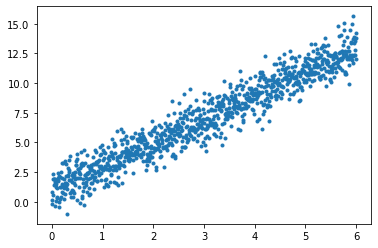

In [10]:
plt.plot(x, y, marker='.', linestyle='none')

There is a clear pattern in the data. This is expected as we generated the data using a relation of the form

$$ y = a*x + b + \epsilon, ~~ \epsilon \sim N(0,1)$$

Let's generate some more hypothetical data 

In [12]:
y_neg = func(x=x, alpha= -1.0, beta=1.0, normal_dist=normal_dist)

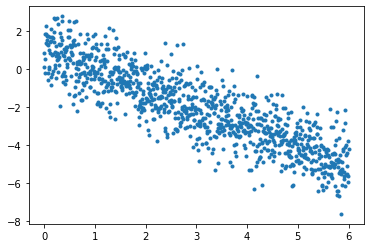

In [13]:
plt.plot(x, y_neg, marker='.', linestyle='none')

In [17]:
y_rand = np.random.normal(3.5, 0.01, size=1000)

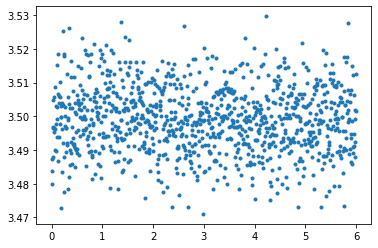

In [18]:
plt.plot(x, y_rand, marker='.', linestyle='none')

The plots above show three different stories told by the data

- Top plot: Strong positive relation between $x$ and $y$
- Middle plot: Strong negative relation between $x$ and $y$
- Bottom plot: No apparent relation between $x$ and $y$

When looking at relations in variables, scatter plots like the ones above are very useful. We should look for

- Direction: Positive, negative neither
- Form : straight line, curved, no pattern
- Strength: Strong, weak
- Unsual features e.g. outliers

## Pearson correlation coefficient

The Pearson correlation coefficient $\rho \in [-1, 1]$ is a dimensionless statistic of how two variables vary together. It is defined as

$$\rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In words, the formula above tells us that  $\rho$ is the ratio of variability due to codependence over independent variability. It can be computed with ```numpy``` as 

```
rho = np.corrcoef(X,Y)
```

The <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation coefficient</a>, measures the strength of **linear association** between two quantitative variables. Thus, in order to interpret a Pearson correlation coefficient we must assume that there is an underlying linear relationship. Given this assumption, it is always a good idea to plot the data to and check whether this assumption is correct. In fact, before drawing any conclusions based on the correlation coefficient make sure that

- Correlation is only about quantitative variables not categorical
- Check on the scatter plot whether the linearity assumption is a reasonable one
- Outliers can distort the correlation coefficient making a weak association look strong and vice versa

Let's compute the Pearson correlation coefficients for the previous examples.

In [21]:
np.corrcoef(x, y)[0, 1]


0.9599499817016037

In [22]:
np.corrcoef(x, y_neg)[0, 1]


-0.8655897110729708

In [23]:
np.corrcoef(x, y_rand)[0, 1]

-0.0655772831044657

The results show that for the first two cases, we have a strong relationship between $X$ and $Y$ why for the thrid case the relationship is quite weak. Indeed according to Cohen's criteria, see [1],

| $\rho$           | Size of the effect |
| ----------- | ------------------ |
| $\pm$ 0.1   | Small              |
| $\pm$ 0.3   | Medium             |
| $\pm$ 0.5   | Large              |

### Correlation properties

### Other types of correlation coefficients

In this subsection, we briefly touch upon other correlation coefficients. For more information the reader is referred to [1] and the provided references.

#### Point-biserial correlation coefficient

#### Biserial correlation coefficient

## Summary

## <a name="refs"></a> References

1. Larry Hatcher, _Advanced statistics in research_, Shadow Finch Media.